In [1]:
import merg_rates3 as merg_rates
import my_sham_hack3 as sham
import numpy as np
import pandas as pd
import random
import time
import staudt_utils3 as sutils

from progressbar import ProgressBar
from itertools import cycle, islice

In [72]:
import matplotlib as mpl 
#mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D
from cycler import cycler
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18
#rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
#rcParams['axes.prop_cycle'] = prop_cycle_prev

In [3]:
with open('/home/users/staudt/projects/mergers/data/arw_quench.dat',
          'r') as f:
    df = pd.DataFrame((l.rstrip().split() for l in f),dtype=float)
ms=np.array(df[0])

with open('/home/users/staudt/projects/mergers/data/arw_lidromar_mrgfrac.csv',
          'r') as f:
    arw_lidromar = pd.read_csv(f)

In [4]:
htpm=merg_rates.HalTreepmClass()

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18

In [6]:
scat=0.
mmin=3.

st=time.time()

'''
mar_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('marchesini'),scat=scat,
        mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('perez'),scat=scat,
        mmin=mmin)
'''
san_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('santini'),scat=scat,
        mmin=mmin)
'''
muz_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('muzzin-sameslope'),scat=scat,
        mmin=mmin)
fon_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('fontana'),scat=scat,
        mmin=mmin)
'''

gtpms=[#mar_tpm,
       #per_tpm,
       san_tpm,
       #muz_tpm,fon_tpm
      ]
for gtpm in gtpms:    
    #mp_tree(htpm,gal_tpm=gtpm)
    #merg_tree(htpm,gal_tpm=gtpm)
    htpm.mp_tree(gal_tpm=gtpm)
    htpm.merg_tree(gal_tpm=gtpm)

print('{0:0.1f} min runtime'.format((time.time()-st)/60.))

running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
55190 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
71716 merge with larger galaxies
4914942 galaxies in snapshot 26
77090 merge with larger galaxies
5105362 galaxies in snapshot 25
81869 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
57538

In [46]:
def quench_frac_f(gtpm,ziend=34):
    st=time.time()
    f3=gtpm.quench_frac_ft(min_mu=np.log10(1./3.),zibeg=1,ziend=ziend,M0s=ms)
    f10=gtpm.quench_frac_ft(min_mu=np.log10(1./10.),zibeg=1,ziend=ziend,M0s=ms)
    print('{0:0.1f} min runtime'.format((time.time()-st)/60.))
    return f3[0],f3[1],f10[1]

In [47]:
def mk_quench_plt(fs_mar,fs_per,fs_san,fs_muz,fs_fon,scat,zi):
    z=htpm.subcat[zi].snap['z']
    def get_shade(dat,axi):
        fs=np.array([dat[i][axi] for i in range(dat.shape[0])])
        lo=fs.min(axis=0)
        hi=fs.max(axis=0)
        return np.array([lo,hi])

    dat=np.array([fs_mar,fs_per,fs_san,
         fs_muz,fs_fon])
    shade3=get_shade(dat,1)
    shade10=get_shade(dat,2)
    nams=['Marchesini','Perez-Gonzalez','Santini','Muzzin','Fontana']

    fig,axs=plt.subplots(3,2,figsize=(17,15),sharex=True,sharey=True)
    axs=axs.ravel()
    fig.subplots_adjust(wspace=0.,hspace=0.)

    cols = mpl.cm.rainbow(np.linspace(0, 1, 5))

    for axi,(fs,nam) in enumerate(zip(dat,nams)):
        axs[axi].fill_between(ms,shade3[1],shade3[0],alpha=0.1,color=cols[0])
        axs[axi].fill_between(ms,shade10[1],shade10[0],alpha=0.1,color=cols[1])

        axs[axi].errorbar(ms,df[1],yerr=df[2],fmt='o',color='r',
                    elinewidth=0.9,capsize=3,ecolor='k',label='SDSS quenched centrals')
        #axs[axi].plot(ms,df[3],'--',label='Wetzel, $\mu=1/10$',color=cols[3])
        #axs[axi].plot(ms,df[5],'--',label='Wetzel, $\mu=1/3$',color=cols[4])
        
        axs[axi].plot(np.log10(arw_lidromar['M_{R>0.33,z<=2.1}']),arw_lidromar['f_{R>0.33,z<=2.1}'],
                      '--',label='Wetzel (Li-Drory-March), $\mu=1/3$, $z\leq2.1$',color=cols[4])
        axs[axi].plot(np.log10(arw_lidromar['M_{R>0.1,z<=2.1}']),arw_lidromar['f_{R>0.1,z<=2.1}'],
                      '--',label='Wetzel (Li-Drory-March), $\mu=1/10$, $z\leq2.1$',color=cols[3])

        axs[axi].plot(fs[0],fs[2],'-',label='$\mu=1/10$, $z\leq{0:0.1f}$'.format(z),
                      color=cols[1],lw=3)
        axs[axi].plot(fs[0],fs[1],'-',label='$\mu=1/3$, $z\leq{0:0.1f}$'.format(z),
                      color=cols[0],lw=3)

        axs[axi].text(0.1,0.9,nam,fontsize=20,horizontalalignment='left',
            transform=axs[axi].transAxes,
            bbox=dict(facecolor='white',alpha=0.7,edgecolor='none'))

    axs[0].set_ylim(0,1)
    axs[0].legend(bbox_to_anchor=(0.5,0.05),
              bbox_transform=fig.transFigure,
              loc="upper center",ncol=3)

    for axi in [0,2,4]:
        axs[axi].set_ylabel('$f_\mathrm{gal}(\,N_\mathrm{merg}(>\mu)\geq1\,)$')
    for axi in [4,5]:
        axs[axi].set_xlabel('log $M_0/$M$_\odot$')
        plt.setp(axs[axi].xaxis.get_majorticklabels(),rotation=45)

    plt.suptitle('$\sigma={0:0.2f}$ dex'.format(scat),fontsize=25,y=0.92)

    plt.show()

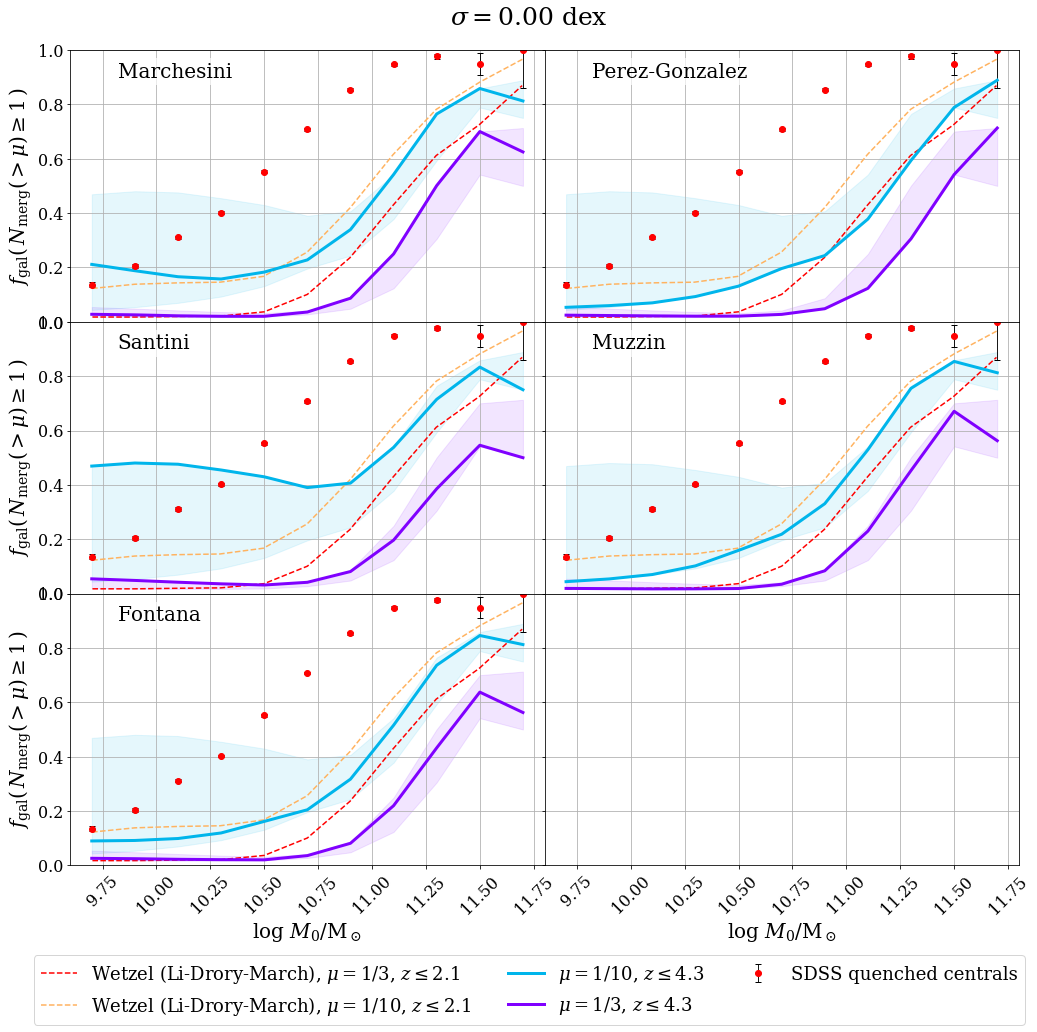

In [120]:
#fs_mar=quench_frac_f(mar_tpm)
#fs_per=quench_frac_f(per_tpm)
#fs_san=quench_frac_f(san_tpm)
#fs_muz=quench_frac_f(muz_tpm)
#fs_fon=quench_frac_f(fon_tpm)

mk_quench_plt(fs_mar,fs_per,fs_san,fs_muz,fs_fon,0.,34)

### from z=0 to z=2

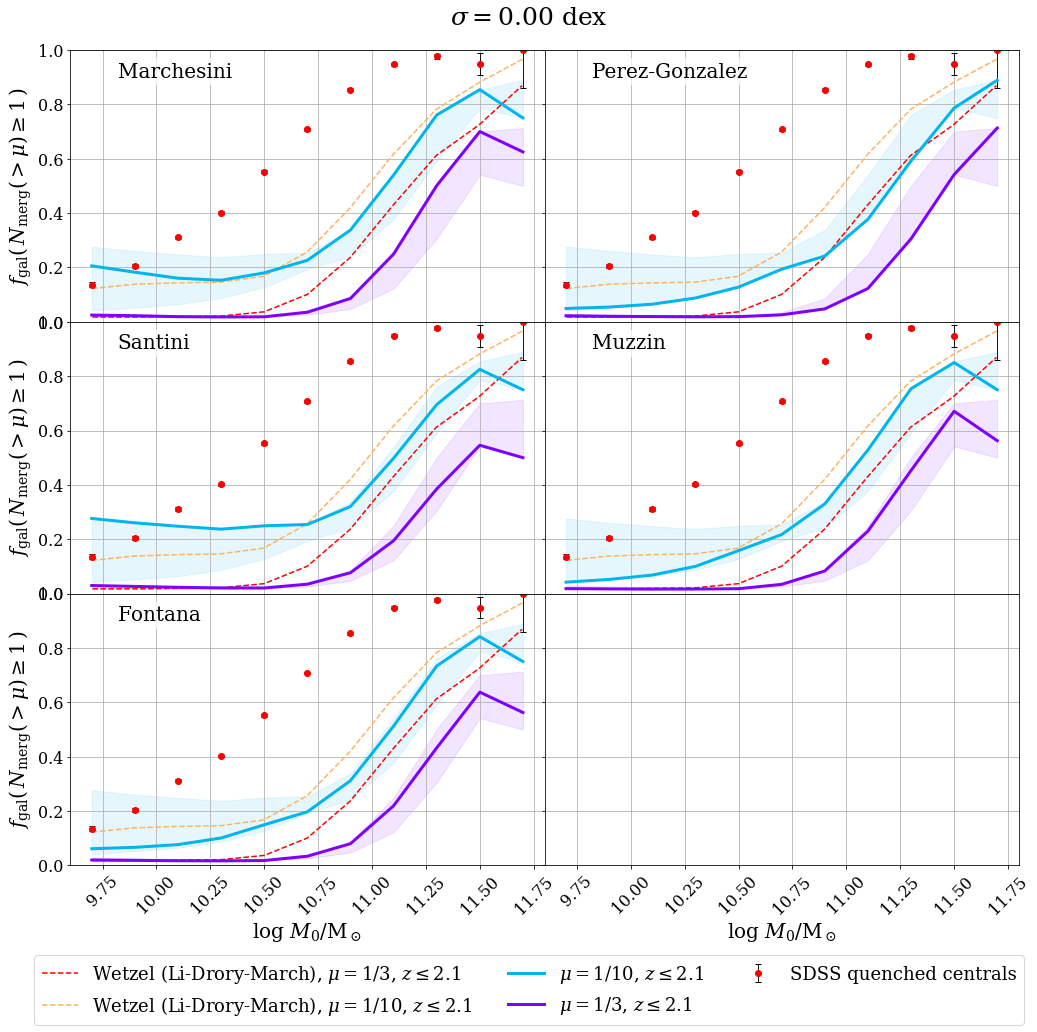

In [121]:
#fs_mar_23=quench_frac_f(mar_tpm,ziend=23)
#fs_per_23=quench_frac_f(per_tpm,ziend=23)
#fs_san_23=quench_frac_f(san_tpm,ziend=23)
#fs_muz_23=quench_frac_f(muz_tpm,ziend=23)
#fs_fon_23=quench_frac_f(fon_tpm,ziend=23)

mk_quench_plt(fs_mar_23,fs_per_23,fs_san_23,fs_muz_23,fs_fon_23,0.,23)

### from z=0 to z=1

running quench data:


100% |########################################################################|


running quench data:


100% |########################################################################|


0.4 min runtime


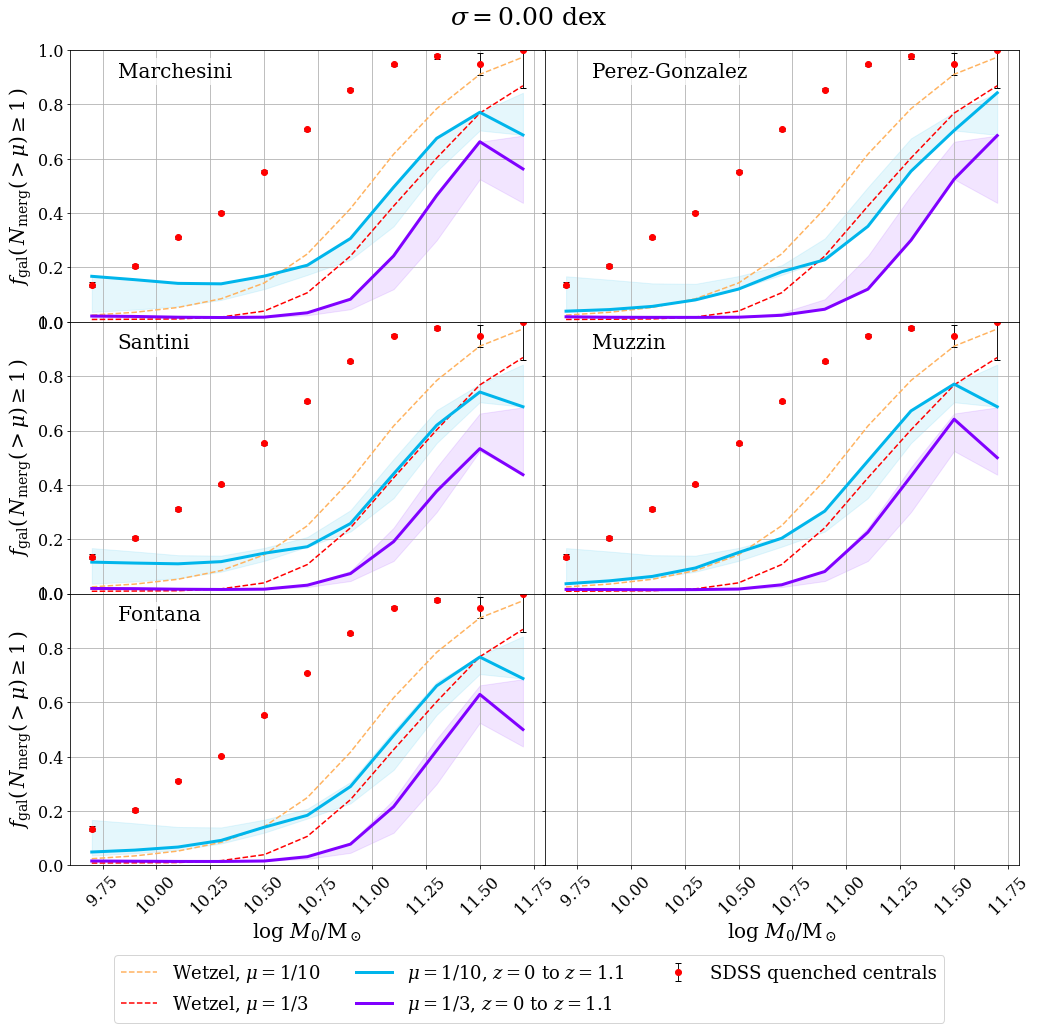

In [82]:
fs_mar_15=quench_frac_f(mar_tpm,ziend=15)
#fs_per_15=quench_frac_f(per_tpm,ziend=15)
#fs_san_15=quench_frac_f(san_tpm,ziend=15)
#fs_muz_15=quench_frac_f(muz_tpm,ziend=15)
#fs_fon_15=quench_frac_f(fon_tpm,ziend=15)

%matplotlib inline
mk_quench_plt(fs_mar_15,fs_per_15,fs_san_15,fs_muz_15,fs_fon_15,0.,15)

## zi=0 to zi=33

running quench data:


100% |########################################################################|


running quench data:


100% |########################################################################|


0.7 min runtime
running quench data:


100% |########################################################################|


running quench data:


100% |########################################################################|


0.8 min runtime


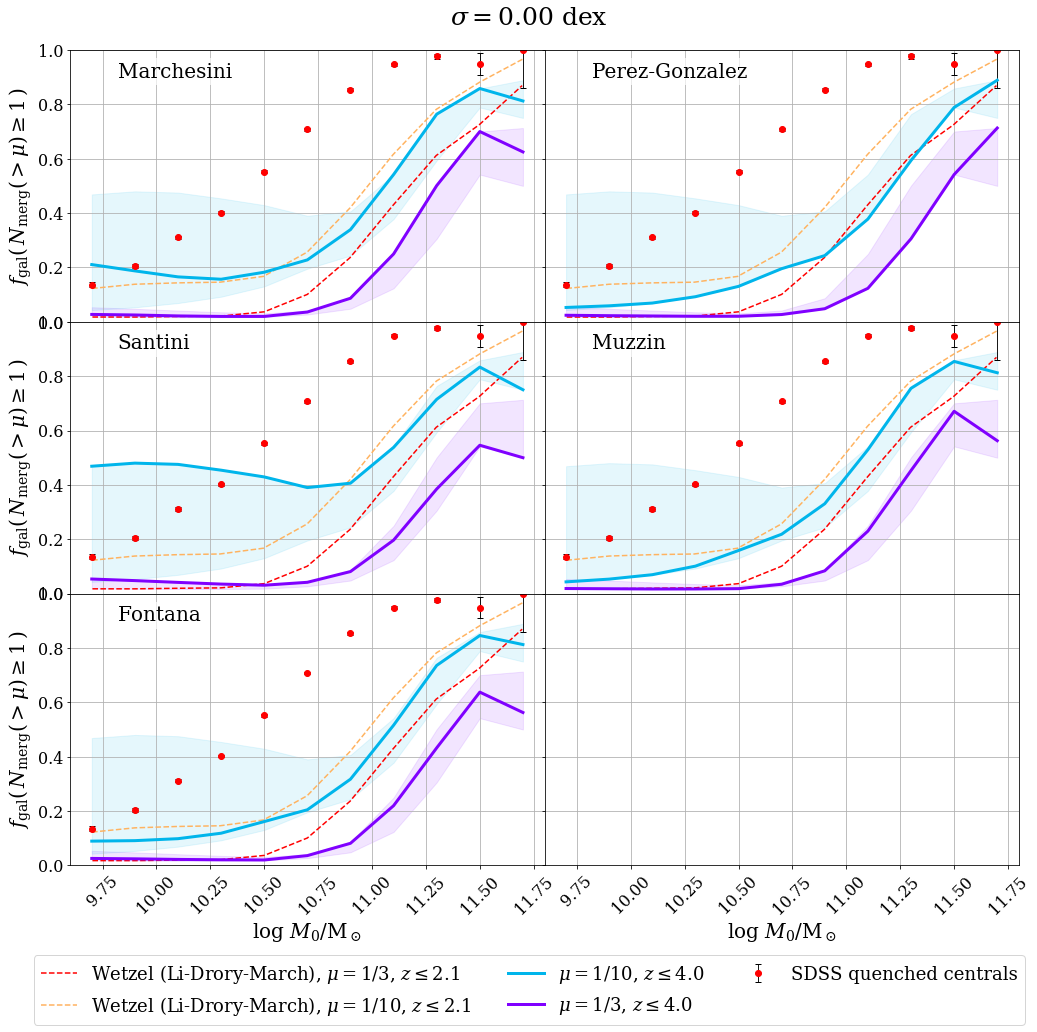

In [52]:
#fs_mar_33=quench_frac_f(mar_tpm,ziend=33)
#fs_per_33=quench_frac_f(per_tpm,ziend=33)
#fs_san_33=quench_frac_f(san_tpm,ziend=33)
fs_muz_33=quench_frac_f(muz_tpm,ziend=33)
fs_fon_33=quench_frac_f(fon_tpm,ziend=33)

%matplotlib inline
mk_quench_plt(fs_mar_33,fs_per_33,fs_san_33,fs_muz_33,fs_fon_33,0.,33)

### With a Moustakas base:

In [14]:
#fs_mar=quench_frac_f('mous-mar')
#fs_per=quench_frac_f('mous-per')
#fs_san=quench_frac_f('mous-san')
#fs_muz=quench_frac_f('mous-muz')
#fs_fon=quench_frac_f('mous-fon')

In [15]:
#mk_quench_plt(fs_mar,fs_per,fs_san,fs_muz,fs_fon)

# Looking for the discrepancy

In [11]:
M0test=9.7
min_mu_test=np.log10(1./10.)
mu_rng_test=[min_mu_test,0.]
Mwid_test=0.1
hgram_dat_san=hgram_dat_ft(san_tpm, mu_rng_test, M0test, Mwid=Mwid_test, indices=True)
#hgram_dat_mar=hgram_dat_ft(mar_tpm, mu_rng_test, M0test, Mwid=Mwid_test, indices=True)
hgram_dat_per=hgram_dat_ft(per_tpm, mu_rng_test, M0test, Mwid=Mwid_test, indices=True)

In [13]:
def inrng_f(tpm,M0):
    cat=tpm.galcat
    mtype=tpm.gmtype
    hi0s=np.arange(len(cat[0][mtype]))
    M0s=cat[0][mtype]
    inrng = (M0s>M0-Mwid_test/2.) & (M0s<M0+Mwid_test/2.)
    hi0s=hi0s[inrng]
    return hi0s
#mar_hi0s_merg=hgram_dat_mar[2]
san_hi0s_merg=hgram_dat_san[2]
per_hi0s_merg=hgram_dat_per[2]
#mar_all_hi0s=inrng_f(mar_tpm,M0test)
san_all_hi0s=inrng_f(san_tpm,M0test)
per_all_hi0s=inrng_f(per_tpm,M0test)

#print(len(mar_hi0s_merg))
#print(len(mar_all_hi0s))
#print('')

print(len(san_hi0s_merg))
print(len(san_all_hi0s))
print('')

print(len(per_hi0s_merg))
print(len(per_all_hi0s))

19521
41605

3015
56586


In [14]:
#print(float(len(mar_hi0s_merg)) / float(len(mar_all_hi0s)))
print(float(len(san_hi0s_merg)) / float(len(san_all_hi0s)))
print(float(len(per_hi0s_merg)) / float(len(per_all_hi0s)))

0.46919841365220527
0.0532817304633655


In [15]:
san_hi0s_merg

[298,
 492,
 522,
 674,
 688,
 713,
 737,
 837,
 1644,
 1751,
 1971,
 1978,
 2435,
 2519,
 2628,
 2849,
 2889,
 3128,
 3340,
 3769,
 3829,
 3847,
 4201,
 4215,
 4408,
 4509,
 4576,
 4808,
 5506,
 5744,
 5997,
 6004,
 6103,
 6270,
 6816,
 7028,
 7079,
 8038,
 8802,
 9001,
 10663,
 10983,
 10986,
 11155,
 11520,
 11851,
 11860,
 12017,
 12030,
 12059,
 12804,
 13095,
 13116,
 13147,
 13200,
 13326,
 13938,
 14037,
 14086,
 14282,
 14434,
 14448,
 14640,
 14651,
 14698,
 14802,
 14810,
 15305,
 15773,
 16352,
 16435,
 16503,
 16904,
 17050,
 17108,
 17127,
 17283,
 17831,
 18495,
 19371,
 19431,
 19447,
 19680,
 20181,
 20833,
 20916,
 20917,
 21739,
 22124,
 22165,
 22214,
 22256,
 22386,
 22963,
 23063,
 23176,
 23220,
 23356,
 23911,
 24140,
 24240,
 24938,
 25093,
 25206,
 25231,
 25239,
 25901,
 27262,
 27606,
 27615,
 27635,
 27657,
 27868,
 28180,
 28204,
 28431,
 29574,
 30264,
 30265,
 30409,
 30604,
 31386,
 31617,
 31807,
 31877,
 32083,
 32100,
 32199,
 32291,
 32420,
 32812,


In [17]:
per_hi0s_merg

[819,
 5521,
 6158,
 8229,
 10656,
 12252,
 12577,
 14674,
 14682,
 14919,
 17649,
 22326,
 31153,
 33328,
 33335,
 34183,
 35934,
 36573,
 42425,
 42560,
 43040,
 44738,
 48264,
 48897,
 53872,
 55655,
 56156,
 57742,
 59693,
 60026,
 61573,
 62760,
 62981,
 63310,
 64664,
 66825,
 67183,
 67693,
 70114,
 70967,
 73452,
 74807,
 76570,
 77609,
 83047,
 84935,
 85094,
 87659,
 87813,
 88084,
 88921,
 89667,
 90914,
 96222,
 96267,
 97933,
 102406,
 102430,
 104783,
 109083,
 110393,
 112316,
 119631,
 120702,
 120727,
 120871,
 124213,
 125150,
 128700,
 132657,
 133522,
 134255,
 134569,
 135839,
 143411,
 143412,
 144423,
 144704,
 145842,
 150395,
 151343,
 153820,
 153898,
 154014,
 155203,
 156689,
 159948,
 161916,
 163310,
 166625,
 171711,
 173292,
 173319,
 174746,
 177885,
 182370,
 182751,
 183627,
 183799,
 184324,
 189246,
 189402,
 192333,
 192619,
 201031,
 201305,
 202119,
 202274,
 215919,
 216633,
 217398,
 219046,
 222822,
 226257,
 227774,
 228868,
 230334,
 231741,

## Inspect 819 from Perez and Santini

In [38]:
def list_mergers(tpm,hi0):
    zis=np.arange(35)
    cat=tpm.galcat
    M0=cat[0][tpm.gmtype][hi0]
    print('M0 = {0:0.2f}'.format(M0))
    for zi in zis[1:]:
        mp_branch=cat[zi-1]['gal.mp.branch']
        if not hi0 in mp_branch:
            continue
        chii=mp_branch[hi0]
        m_branch=cat[zi]['gal.merg.branch']
        if chii not in m_branch:
            continue
        merg_is=m_branch[chii]
        ms=cat[zi][tpm.gmtype][merg_is]
        mpi=cat[zi]['gal.mp.branch'][hi0] #main progenitor index
        M=cat[zi][tpm.gmtype][mpi]
        print(zi)
        print(merg_is)
        print(ms)
        print('Main progenitor mass @ zi={1:d}: {0:0.2f}'.format(M,zi))
        print('m/M:')
        print(10.**(ms-M))
    return
list_mergers(san_tpm,819)
print('')
list_mergers(per_tpm,819)

M0 = 9.33
2
[5220617]
[9.114898]
Main progenitor mass @ zi=2: 9.33
m/M:
[0.61316943]

M0 = 9.66
2
[5220617]
[9.470926]
Main progenitor mass @ zi=2: 9.65
m/M:
[0.65763307]


In [40]:
260263 in san_hi0s_merg

True

# Making a scattered run

In [45]:
'''
mar_tpm_scat=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('marchesini'),scat=0.15,
        mmin=mmin)
per_tpm_scat=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('perez'),scat=0.15,
        mmin=mmin)
san_tpm_scat=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('santini'),scat=0.15,
        mmin=mmin)
muz_tpm_scat=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('muzzin-sameslope'),scat=0.15,
        mmin=mmin)
fon_tpm_scat=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('fontana'),scat=0.15,
        mmin=mmin)
'''

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


In [46]:
'''
gtpms_scat=[mar_tpm_scat,per_tpm_scat,
            san_tpm_scat,muz_tpm_scat,fon_tpm_scat]
for gtpm in gtpms_scat:
    st=time.time()
    htpm.mp_tree(gal_tpm=gtpm)
    htpm.merg_tree(gal_tpm=gtpm)
    print('{0:0.1f} min runtime'.format((time.time()-st)/60.))
'''

building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1578 merge with larger galaxies
2906961 galaxies in snapshot 33
7245 merge with larger galaxies
3267446 galaxies in snapshot 32
18686 merge with larger galaxies
3591830 galaxies in snapshot 31
30122 merge with larger galaxies
3901457 galaxies in snapshot 30
41292 merge with larger galaxies
4187628 galaxies in snapshot 29
41948 merge with larger galaxies
4451504 galaxies in snapshot 28
13323 merge with larger galaxies
4697199 galaxies in snapshot 27
4895 merge with larger galaxies
4914942 galaxies in snapshot 26
2037 merge with larger galaxies
5105362 galaxies in snapshot 25
2149 merge with larger galaxies
5270374 galaxies in snapshot 24
3236 merge with larger galaxies
5409626 galaxies in snapshot 23
4205 merge with larger galaxies
5527314 galaxies in snapshot 22
5538 merge with larger galaxies
5620673 galaxies in snapshot 21
6291 merge with larger galaxies
5697344 galaxies in snapshot 20
7312 merge with larger galaxies
5753867 galax

47174 merge with larger galaxies
2.1 min runtime
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1600 merge with larger galaxies
2906961 galaxies in snapshot 33
7320 merge with larger galaxies
3267446 galaxies in snapshot 32
19031 merge with larger galaxies
3591830 galaxies in snapshot 31
5141 merge with larger galaxies
3901457 galaxies in snapshot 30
3276 merge with larger galaxies
4187628 galaxies in snapshot 29
5055 merge with larger galaxies
4451504 galaxies in snapshot 28
12786 merge with larger galaxies
4697199 galaxies in snapshot 27
25970 merge with larger galaxies
4914942 galaxies in snapshot 26
41437 merge with larger galaxies
5105362 galaxies in snapshot 25
63627 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
5753867 

47174 merge with larger galaxies
2.3 min runtime
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
55190 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
71716 merge with larger galaxies
4914942 galaxies in snapshot 26
77090 merge with larger galaxies
5105362 galaxies in snapshot 25
81869 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
57538

47174 merge with larger galaxies
2.5 min runtime
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1642 merge with larger galaxies
2906961 galaxies in snapshot 33
7177 merge with larger galaxies
3267446 galaxies in snapshot 32
11 merge with larger galaxies
3591830 galaxies in snapshot 31
27 merge with larger galaxies
3901457 galaxies in snapshot 30
864 merge with larger galaxies
4187628 galaxies in snapshot 29
4176 merge with larger galaxies
4451504 galaxies in snapshot 28
9583 merge with larger galaxies
4697199 galaxies in snapshot 27
15390 merge with larger galaxies
4914942 galaxies in snapshot 26
22939 merge with larger galaxies
5105362 galaxies in snapshot 25
29921 merge with larger galaxies
5270374 galaxies in snapshot 24
37272 merge with larger galaxies
5409626 galaxies in snapshot 23
54439 merge with larger galaxies
5527314 galaxies in snapshot 22
73198 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
5753867 galaxie

47174 merge with larger galaxies
3.4 min runtime
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
55190 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
71716 merge with larger galaxies
4914942 galaxies in snapshot 26
77090 merge with larger galaxies
5105362 galaxies in snapshot 25
81869 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
57538

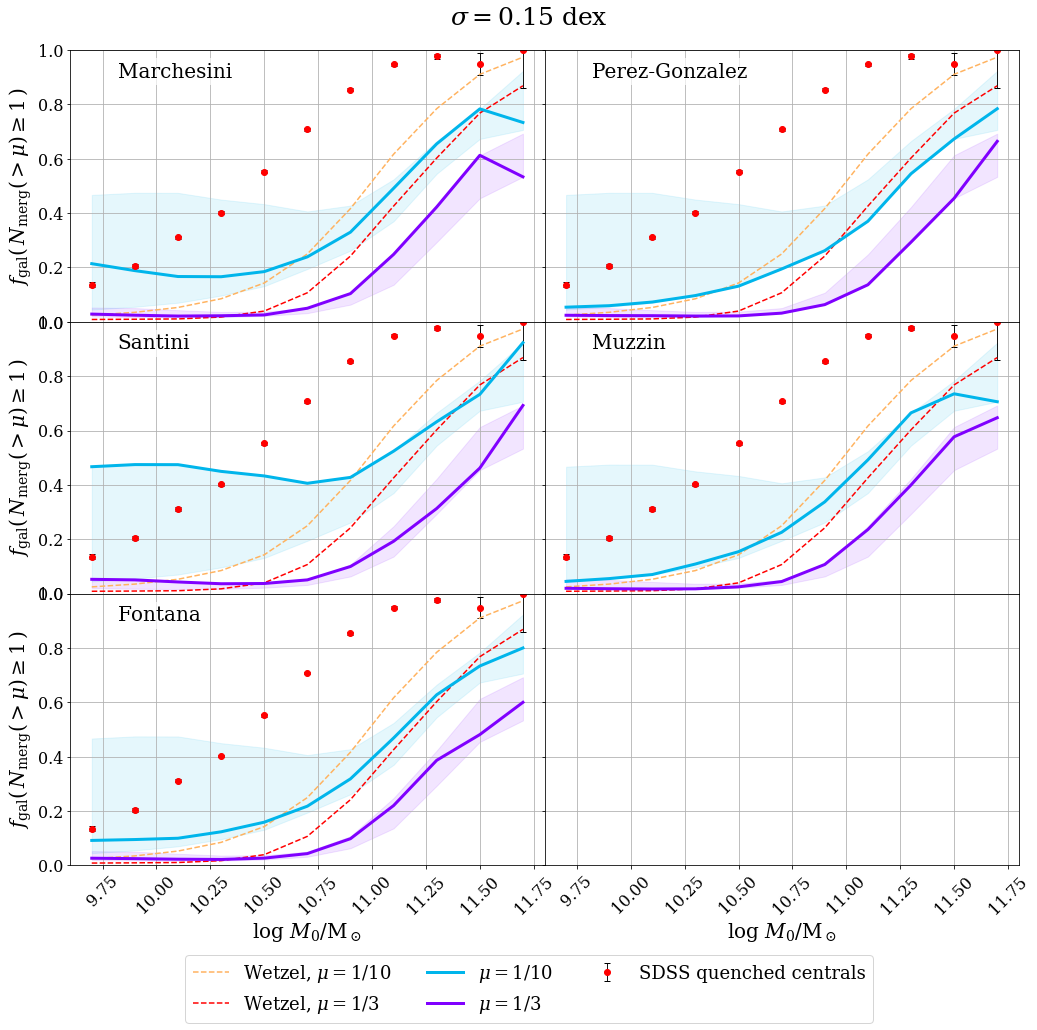

In [50]:
#fs_mar_scat=quench_frac_f(mar_tpm_scat)
#fs_per_scat=quench_frac_f(per_tpm_scat)
#fs_san_scat=quench_frac_f(san_tpm_scat)
#fs_muz_scat=quench_frac_f(muz_tpm_scat)
#fs_fon_scat=quench_frac_f(fon_tpm_scat)

#mk_quench_plt(fs_mar_scat,fs_per_scat,fs_san_scat,
#              fs_muz_scat,fs_fon_scat,0.15)

# SHMR

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


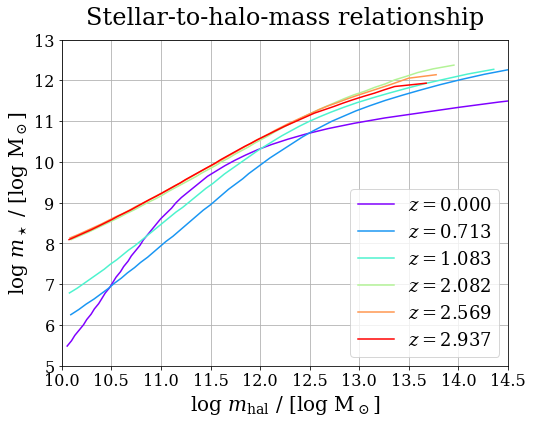

In [227]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
zis_plt=[0,
         11,15,23,26,28]
colors = mpl.cm.rainbow(np.linspace(0, 1, len(zis_plt)))
for zi,c in zip(zis_plt,colors):
    z=htpm.subcat[zi].snap['z']
    
    #ms_hal,ms_gal=san_tpm.shmr_sham(htpm,zi)
    #ms_hal,ms_gal=shmr(htpm,zi,galtpm=san_tpm)
    isnan=np.isnan(ms_hal)
    ax.plot(ms_hal[~isnan],ms_gal[~isnan],'-',
            label='$z={0:0.3f}$'.format(z),color=c)
ax.set_ylim(8,1)    
ax.set_title('Stellar-to-halo-mass relationship')
ax.set_xlabel('log $m_\mathrm{hal}$ / [log M$_\odot$]')
ax.set_ylabel('log $m_\star$ / [log M$_\odot$]')
ax.set_xlim(10,14.5)
ax.set_ylim(5,13)
ax.legend()
plt.show()

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


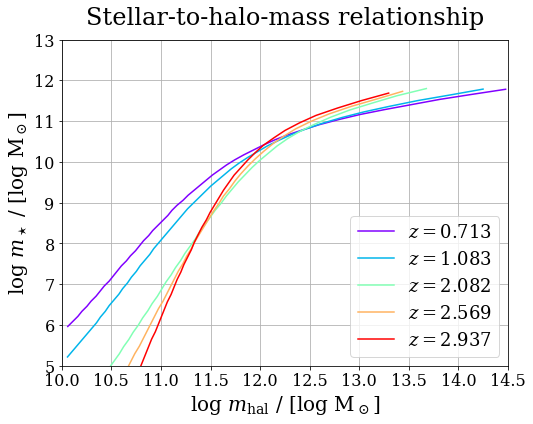

In [228]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
zis_plt=[#0,
         11,15,23,26,28]
colors = mpl.cm.rainbow(np.linspace(0, 1, len(zis_plt)))
for zi,c in zip(zis_plt,colors):
    z=htpm.subcat[zi].snap['z']
    
    ms_hal,ms_gal=shmr(htpm,zi,source='perez',scat=0.,mmin=3.)
    isnan=np.isnan(ms_hal)
    ax.plot(ms_hal[~isnan],ms_gal[~isnan],'-',
            label='$z={0:0.3f}$'.format(z),color=c)
ax.set_ylim(8,1)    
ax.set_title('Stellar-to-halo-mass relationship')
ax.set_xlabel('log $m_\mathrm{hal}$ / [log M$_\odot$]')
ax.set_ylabel('log $m_\star$ / [log M$_\odot$]')
ax.set_xlim(10,14.5)
ax.set_ylim(5,13)
ax.legend()
plt.show()

In [70]:
def get_rng(nam,z):
    if (nam=='muzzin-bestslope')|(nam=='muzzin-sameslope'):
        nam='muzzin'
    mnam=nam+'_m'
    nnam=nam+'_dndlogm'
    rngs=pd.read_csv('/home/users/staudt/projects/mergers/data/smf_ranges.csv')
    zs_lo=rngs['z_low']
    zs_hi=rngs['z_hi']
    if z in list(zs_lo)+list(zs_hi):
        inz=(z==zs_lo)|(z==zs_hi)|((zs_lo<z) & (zs_hi>z))
    else:
        inz=(zs_lo<z) & (zs_hi>z)
    
    try:
        if nam in ['fontana','duncan','baldry']:
            rng_ms=[]
            rng_dndlogms=[]
            for mod in ['_comp_','_inc_']:
                mnam=nam+mod+'m'
                nnam=nam+mod+'dndlogm'
                rng_ms.append(list(rngs[mnam][inz]))
                rng_dndlogms.append(list(rngs[nnam][inz]))
            rng_ms=np.array(rng_ms)
            rng_dndlogms=10.**np.array(rng_dndlogms)
            if rng_ms.shape[-1]==0:
                rng_ms=np.array([[0.1,17.],
                                 [0.1,17.]])
                rng_dndlogms=np.ones((2,2))*np.nan
        else:
            rng_ms=np.array(rngs[mnam][inz])
            rng_dndlogms=np.array(rngs[nnam][inz])
            isnan=np.isnan(rng_ms)
            rng_ms=rng_ms[~isnan]
            rng_dndlogms=10.**rng_dndlogms[~isnan]
    except KeyError:
        rng_ms=np.array([0.1,17.])
        rng_dndlogms=None
    if len(rng_ms)==0:
        rng_ms=np.array([0.1,17.])
        rng_dndlogms=None
    return np.array([rng_ms,rng_dndlogms])

def plt_shmr(ax,source,
             zi,scat,mmin,compl_dashes=[1,0],**kwargs):
    z=htpm.subcat[zi].snap['z']
    ms_hal_all=htpm.subcat[zi][htpm.smtype]
    ms_hal=np.linspace(ms_hal_all.min(),ms_hal_all.max(),500)
    mn_rngs=get_rng(source,z)
    ms_gal = htpm.shmr_avg(ms_hal=ms_hal,zi=zi,source=source,scat=scat,mmin=mmin,
                           Mwid=0.05)
    if source in ['fontana','duncan','baldry']:
        Nrngs=mn_rngs.shape[1]
        ms_fit=np.array([mn_rngs[0][irng] for irng in np.arange(Nrngs)])
        m_min=np.nanmin(ms_fit,1)
        is_compl=ms_gal>=m_min[0]
        is_inc=(ms_gal<m_min[0])&(ms_gal>=m_min[1])
        is_extrap=ms_gal<m_min[1]
    else:
        ms_fit=mn_rngs[0]
        m_min=ms_fit.min()
        is_extrap=ms_gal<m_min
        is_compl=~is_extrap
        is_inc=np.repeat(False,len(ms_gal))
    not_nan=~np.isnan(ms_gal)
    is_compl*=not_nan
    is_inc*=not_nan
    is_extrap*=not_nan
    ms_compl=ms_gal[is_compl]
    ms_inc=ms_gal[is_inc]
    ms_extrap=ms_gal[is_extrap]
    ms_hal_compl=ms_hal[is_compl]
    ms_hal_inc=ms_hal[is_inc]
    ms_hal_extrap=ms_hal[is_extrap]
    
    ####DEBUGGING####
    #print('ms_hal_compl:')
    #print(ms_hal_compl)
    #print('ms_gal_compl:')
    #print(ms_compl)
    #print('ms_hal_extrap:')
    #print(ms_hal_extrap)
    #print('ms_gal_extra:')
    #print(ms_extrap)
    #################
    
    ax.plot(ms_hal_extrap,ms_extrap,dashes=[1,4],**kwargs)
    ax.plot(ms_hal_inc,ms_inc,dashes=[4,3],**kwargs)
    ax.plot(ms_hal_compl,ms_compl,dashes=compl_dashes,**kwargs)
    return None

def plt_allshmrs(ax,zi,scat,mmin):
    z=htpm.subcat[zi].snap['z']
    #print('\nRunning z={0:0.1f}'.format(z))
    
    ms=np.linspace(6,15,500)    
    sources=['cole','li','baldry','drory','mous',
             'perez','muzzin-bestslope',
             'march','fontana','santini','caputi','duncan',
             'lee']
    labels=['Cole et al. (2001)','Li & White (2009)',
            'Baldry et al. (2008)','Drory et al. (2009)',
            'Moustakas et al. (2013)',
            'Perez-Gonzalez et al. (2008)','Muzzin et al. (2013)',
            'Marchesini et al. (2009)','Fontana et al. (2006)',
            'Santini et al. (2012)','Caputi et al. (2011)',
            'Duncan et al. (2014)','Lee et al. (2012)']
    
    #Getting the default colors:
    prop_cycle = plt.rcParams['axes.prop_cycle']
    cols = np.array(prop_cycle.by_key()['color'])
    
    #Switching out some of the default colors that don't work well:
    cols[0]='b'
    cols[4]='#7f0eff'
    cols[5]='k'
    #Adding more colors:
    cols=np.append(cols,['#00ff00','#ff00a5'])
    
    #Cycling through the indices of the colors array so I can give
    #each SMF a color
    col_is=np.array(list(islice(cycle(np.arange(len(cols))),
                                None,
                                len(sources))))
    
    #Indices for the color indices array. I'm generating this to
    #serve the joint purpose of randomizing the color assignment
    #(until I find a combination that looks best) and being able
    #to tell when I've gone through the default color list once,
    #at which point I probably should change the line style.
    
    ##Using the same random seed as when I generated the SMF panel plot
    ##doesn't seem to put the colors in the same order, so I'm commenting
    ##the following and just manually entering the col_iis that I
    ##generated for that panel plot.
    #col_iis=np.arange(len(col_is))
    #Using a seed so I get the same color assignments for each z
    #random.seed(2)
    #random.shuffle(col_iis)
    
    ##Entering the col_iis manually:
    col_iis=np.array([6,9,8,2,3,1,4,5,7,10,0,11,12])
    
    #Change the line style once the code has gone through the
    #default color list once
    isdashed=col_iis>len(cols)-1
    
    for i,(source,col_ii) in enumerate(zip(sources,col_iis)):
        try:
            #The easiest way to test whether the SMF is valid at a given
            #redshift is to make an SMFClass instance and see if it works.
            #I don't use the instance again after this, though.
            smf=sham.SMFClass(source,z)
        #except Z_RangeError:
        except ValueError:
            #print('{0} invalid at {1:0.1f}'.format(source,z))
            continue 
        #Change the line style if I've gone through the default
        #colors once:
        if isdashed[i]:
            dashes=[7,1]
        else:
            dashes=[1,0]
        plt_shmr(ax,source,
                 zi,scat,mmin,compl_dashes=dashes,color=cols[col_is[col_ii]])
    return labels,cols[col_is[col_iis]],isdashed

In [6]:
def mak_shmr_panels(scat,mmin=4.):
    fig,axs=plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)
    axs=axs.ravel()
    fig.subplots_adjust(wspace=0.,hspace=0.)

    pbar=ProgressBar()
    #for axi,z in enumerate([0.1,0.48,1.,2.09,2.57,3.13,4.28]):
    for axi,zi in enumerate([2,8,14,23,26,29,34]):
        labs,lab_cols,isdashed=plt_allshmrs(axs[axi],zi,scat,mmin)
        z=htpm.subcat[zi].snap['z']
        axs[axi].text(0.1,0.9,'$z=${0:0.2f}'.format(z),
                transform=axs[axi].transAxes,
                fontsize=18,ha='left')
        #axs[axi].legend(ncol=2,fontsize=16)

    axs[axi].set_xlim(10,14.5)
    axs[0].set_ylim(6.5,None)
    #axs[0].set_yscale('log')

    for axi in [0,3,6]:
        axs[axi].set_ylabel('log $m_\star\,/\,\mathrm{M}_\odot$')
    for axi in [6,7,8]:
        axs[axi].set_xlabel('log $m_\mathrm{hal}\,/\,\mathrm{M}_\odot$')

    dashess=np.repeat([[1,0]],len(labs),axis=0)
    dashess[np.where(isdashed)[0]]=[3,1]
    cust_lines=[Line2D([0],[0],dashes=list(d),color=col,lw=2) 
                for col,d in zip(lab_cols,dashess)]
    axs[8].legend(cust_lines,labs,ncol=2,fontsize=15)
    plt.suptitle('$\sigma={0:0.2f}$'.format(scat),size=21,y=0.91)

    plt.show()

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less


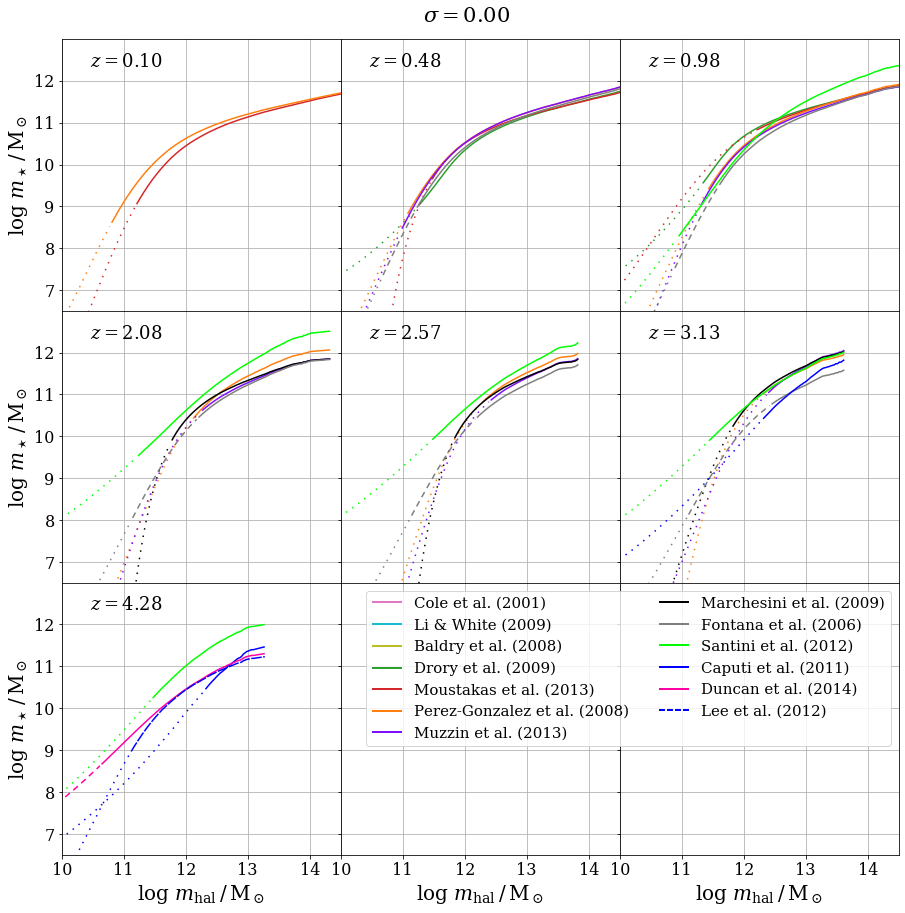

In [73]:
mak_shmr_panels(0.,mmin=3.)

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater_equal
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in less
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater_equal
/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less


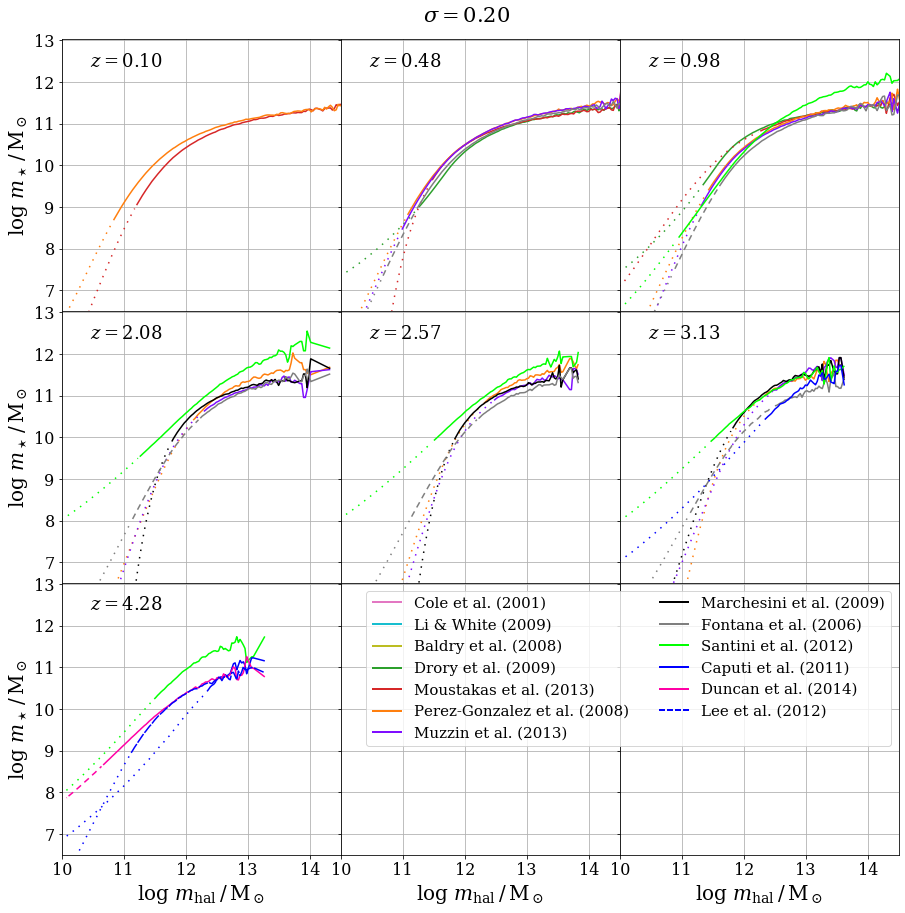

In [74]:
mak_shmr_panels(0.2,mmin=3.)

## Trying to see why I'm not matching the right halo masses to galaxies

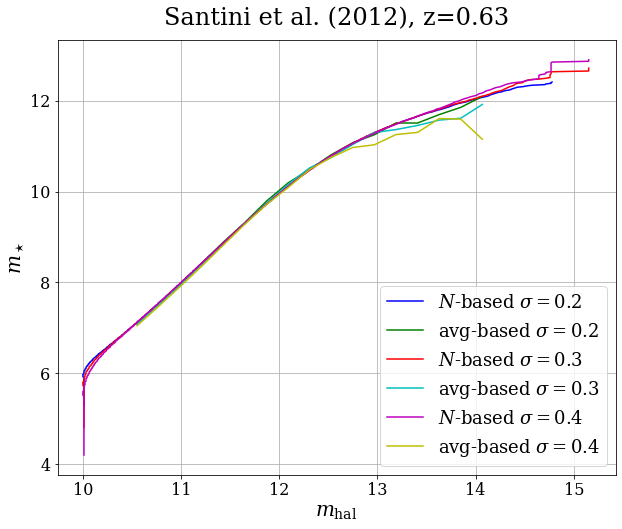

In [50]:
zi=10
source='santini'
scats=[0.2,0.3,0.4]
mmins=[3.,4.,4.5]
ms_hal_all=htpm.subcat[zi][htpm.smtype]
ms_hal=np.linspace(ms_hal_all.min(),ms_hal_all.max(),70)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

for scat,mmin in zip(scats,mmins):
    shmr_dat_sham=htpm.shmr_sham(zi=zi,source=source,scat=scat,mmin=mmin)
    shmr_dat_avg=htpm.shmr_avg(ms_hal=ms_hal,zi=zi,source=source,
                          scat=scat,mmin=mmin,Mwid=0.002)
    ax.plot(shmr_dat_sham[0],shmr_dat_sham[1],
            label='$N$-based $\sigma=${0:0.1f}'.format(scat))
    ax.plot(ms_hal,shmr_dat_avg,
            label='avg-based $\sigma=${0:0.1f}'.format(scat))
ax.set_title('Santini et al. (2012), z={0:0.2f}'.format(htpm.subcat[zi].snap['z']))
ax.set_ylabel('$m_\star$')
ax.set_xlabel('$m_\mathrm{hal}$')
plt.legend()
plt.show()

## Checking the number densities

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


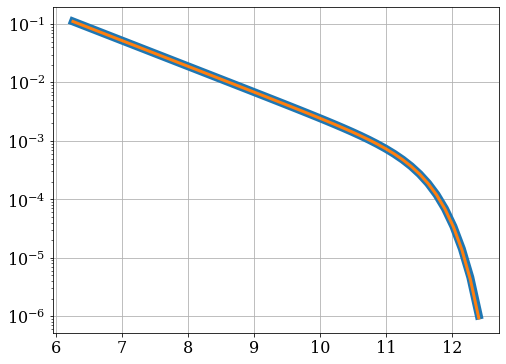

In [73]:
zi=10
z=htpm.subcat[zi].snap['z']

dndm_santpm=htpm.dndm(snap=zi,galtpm=san_tpm)

smf_san=sham.SMFClass(source='santini',redshift=z,scat=0.,mmin=5.)
smf_san2=sham.SMFClass(source='santini',redshift=z,scat=0.2,mmin=5.)
dndm_sansmf=smf_san.dndm(dndm_santpm[0])

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(dndm_santpm[0],dndm_santpm[1],lw=8)
ax.plot(dndm_santpm[0],dndm_sansmf,lw=3)
ax.set_yscale('log')
plt.show()

Number densities match.

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


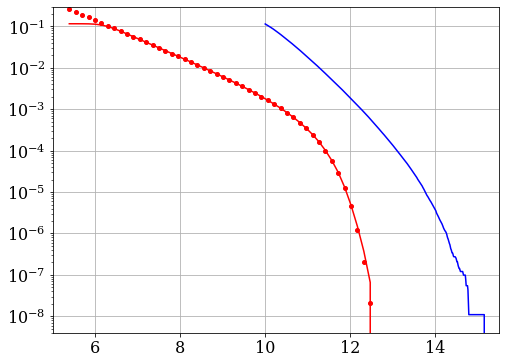

In [118]:
numdens_gal,numdens_hal,ms_gal,ms_hal=shmr_sham(htpm,zi=10,galtpm=san_tpm020)
numdens_gal_smf=[smf_san2.numden(m_gal) for m_gal in ms_gal]

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(ms_gal,numdens_gal,'r-')
ax.plot(ms_gal,numdens_gal_smf,'ro',ms=4)
ax.plot(ms_hal,numdens_hal,'b-')
ax.set_yscale('log')
ax.set_xlim(5,15.5)
ax.set_ylim(4e-9,3e-1)
plt.show()

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


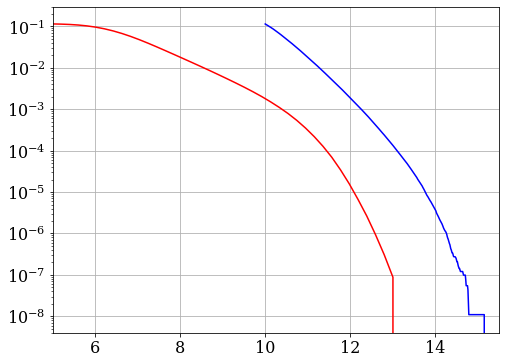

In [117]:
numdens_gal,numdens_hal,ms_gal,ms_hal=shmr_sham(htpm,zi=10,galtpm=san_tpm060)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(ms_gal,numdens_gal,'r-')
ax.plot(ms_hal,numdens_hal,'b-')
ax.set_yscale('log')
ax.set_xlim(5,15.5)
ax.set_ylim(4e-9,3e-1)
plt.show()

# Mass Evolution

In [129]:
def get_evo_dic(tpm,Mcond):
    cat=tpm.galcat
    Mwid=0.2   
    m0s=cat[0]['m.star']
    inrange=(m0s<Mcond+Mwid/2.)&(m0s>Mcond-Mwid/2.)
    ms={}
    mrats={}
    
    hi0s=np.arange(len(m0s))[inrange]
    pbar=ProgressBar()
    for hi0 in pbar(hi0s):
        ms_hi0=[cat[0]['m.star'][hi0]]
        mrats_hi0=[1.]
        for zi in range(1,35):
            mpbr=cat[zi]['gal.mp.branch']
            if hi0 in mpbr:
                hi=mpbr[hi0]
                ms_hi0_z=cat[zi]['m.star'][hi]
                ms_hi0+=[ms_hi0_z]
                mrats_hi0+=[10.**(ms_hi0_z-ms_hi0[0])]
            else:
                ms_hi0+=[0.]
                mrats_hi0+=[np.nan]
        ms[hi0]=np.array(ms_hi0)
        mrats[hi0]=np.array(mrats_hi0)
    return ms,mrats

def plt_sample(ms,N,nam,M0,alpha,colorful=False,showavg=True):
    hi0s_all=np.array(list(ms.keys()))
    avg_ms=np.sum([ms[hi0] for hi0 in hi0s_all],axis=0)/hi0s_all.size
    hi0s=random.sample(list(hi0s_all),N)
    ms_sam={hi0: ms[hi0] for hi0 in hi0s}
    
    zis=np.arange(35)
    zs=np.array([htpm.subcat[zi].snap['z'] for zi in zis])
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    if colorful:
        cols = mpl.cm.rainbow(np.linspace(0, 1, N))
    else:
        cols = np.repeat('b',N)
    for i,hi0 in enumerate(hi0s):
        ax.plot(zs,ms[hi0],'-',color=cols[i]
                #,alpha=0.06
                ,alpha=alpha
               )
    if showavg:
        ax.plot(zs,avg_ms,'-',lw=4,color=(0./255.,1,1),label='average')
        ax.legend(loc='lower left')
    ax.set_ylim(1,None)
    ax.set_xlabel('$z$')
    ax.set_ylabel('log $m_\star/$M$_\odot$')
    plt.suptitle('{0}-based'.\
                 format(nam),size=22,y=1.01)
    ax.set_title('{1:d} randomly sampled galaxies of $m_{{\star,0}}=10^{{{0:0.1f}}}$ M$_\odot$'.\
                 format(M0,N),size=17)
    plt.show()

## Santini

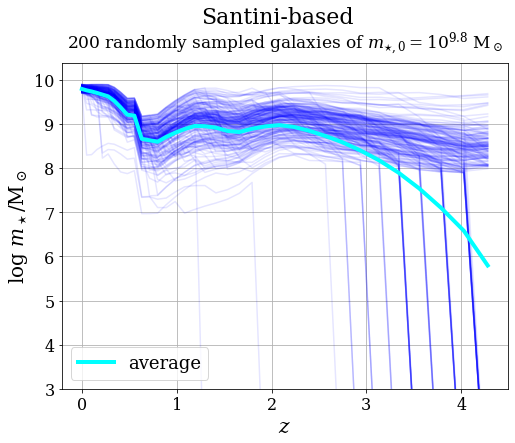

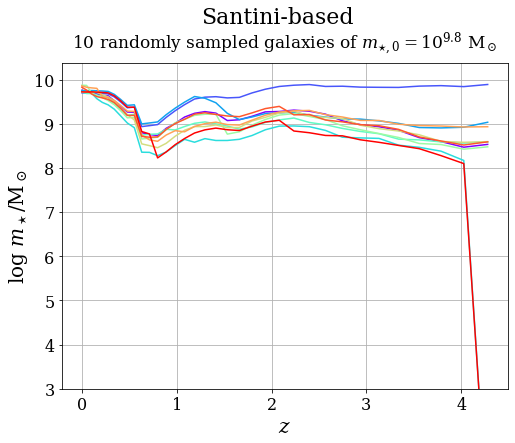

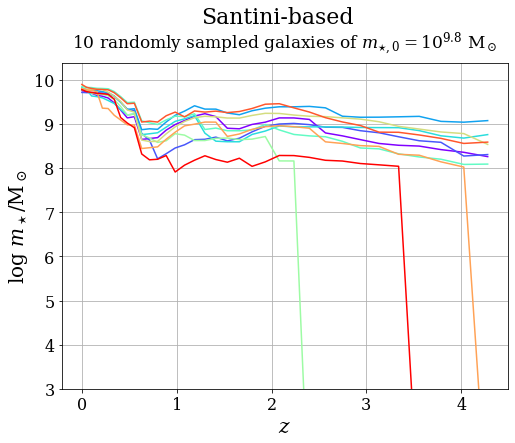

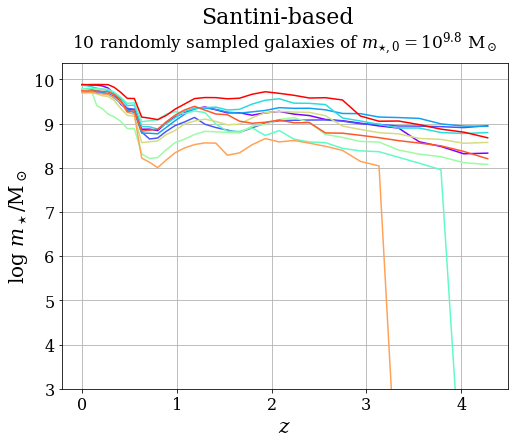

In [126]:
#ms_evo_san098, mrats_evo = get_evo_dic(san_tpm,9.8)

plt_sample(ms_evo_san098,200,'Santini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_san098,10,'Santini',9.8,1,colorful=True,
               showavg=False)
    i+=1

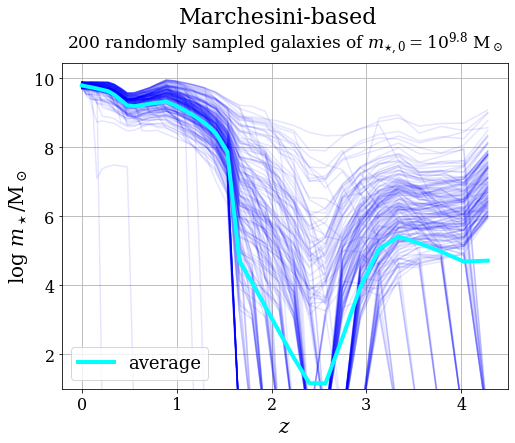

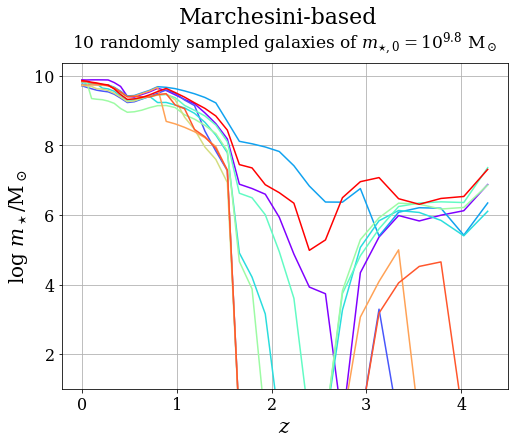

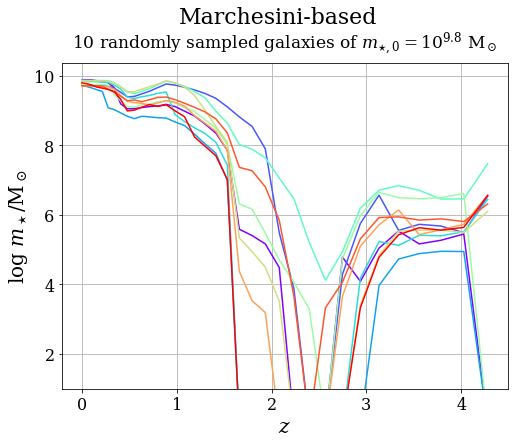

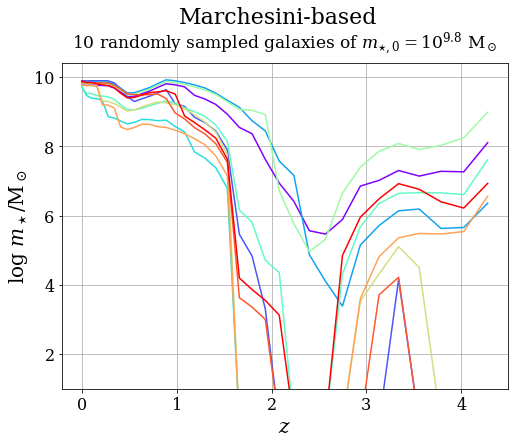

In [131]:
#ms_evo_mar098 = get_evo_dic(mar_tpm,9.8)[0]

plt_sample(ms_evo_mar098,200,'Marchesini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_mar098,10,'Marchesini',9.8,1,colorful=True,
               showavg=False)
    i+=1

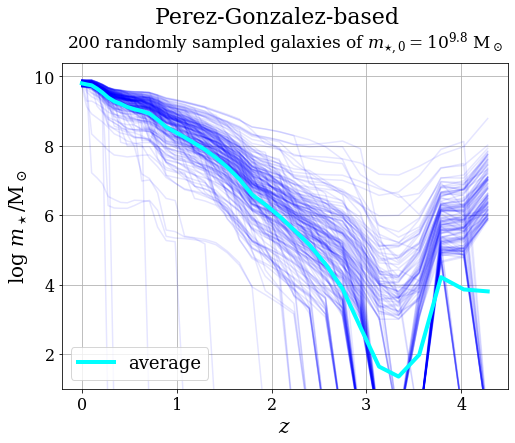

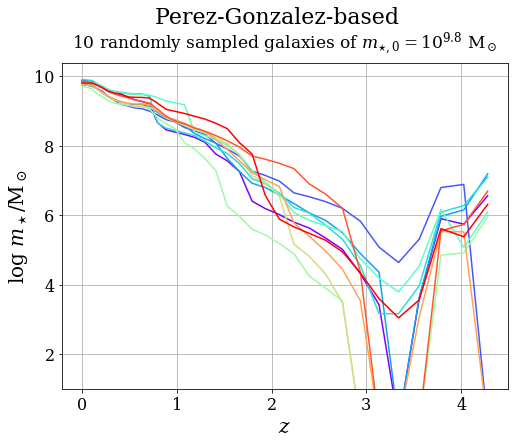

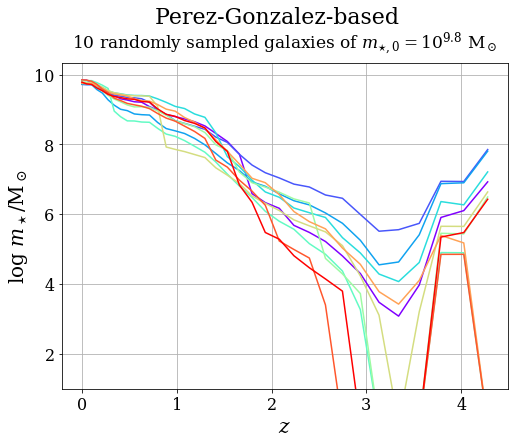

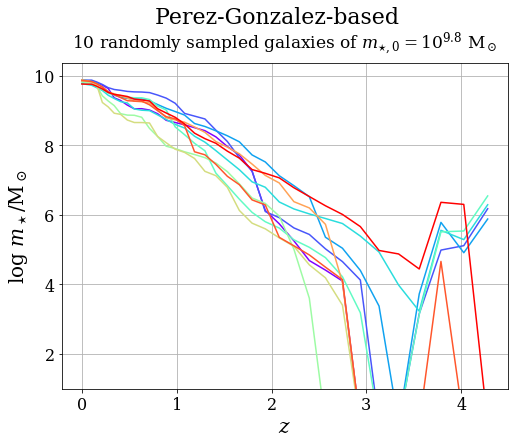

In [134]:
#ms_evo_per098, mrats_evo = get_evo_dic(per_tpm,9.8)

plt_sample(ms_evo_per098,200,'Perez-Gonzalez',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_per098,10,'Perez-Gonzalez',9.8,1,colorful=True,
               showavg=False)
    i+=1

# Reimports and unbound method creations

In [134]:
import importlib
importlib.reload(merg_rates)
importlib.reload(sham)

from merg_rates3 import GalTreepmClass
from merg_rates3 import HalTreepmClass

#unbound methods for testing
mp_tree=HalTreepmClass.mp_tree
merg_tree=HalTreepmClass.merg_tree
quench_frac_ft=GalTreepmClass.quench_frac_ft
hgram_dat_ft=GalTreepmClass.hgram_dat_ft
shmr_sham=HalTreepmClass.shmr_sham
shmr_avg=HalTreepmClass.shmr_avg